### Import all necessary packages - Pandas, Pandas-Profiling, Seaborn, DateUtil

In [304]:
#!pip install pandas-profiling --user
#print(pandas_profiling.__version__)

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from dateutil import parser
import numpy as np

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import data files as Pandas dataframe

In [876]:
chops = pd.read_csv('Chopsticks_Data_Raw.csv', sep=';', header=0)
rain = pd.read_csv('charleston-downtown-data-boolean.csv', sep=',', header=0)

In [881]:
chops['Date'] = pd.to_datetime(chops['Date'])
rain['Date'] = pd.to_datetime(rain['Date'])

### Clean dates in order to add rain data

In [791]:
#dates = chops['Date'].to_string(index =0)

#Date_Final = []

#for date in dates.splitlines():
#    d = parser.parse(date)
#    Date_new = d.strftime("%d-%m-%Y")
#    Date_Final.append(Date_new)
    
#chops['Date'] = Date_Final

### Understand the structure of the data and data types

In [877]:
chops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Columns: 254 entries, Street_Address to Unnamed: 253
dtypes: float64(246), object(8)
memory usage: 1.5+ MB


### It seems like Pandas has imported empty columns, but let's use .head() to check...

In [878]:
chops.head(10)

,Street_Address,Date,Tip,Phone_Number,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253
0,1 Bee,6/20/2016,2.39,8.648848e+09,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.084964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Clearly there are many empty columns that need to be removed...

In [879]:
chops = chops.dropna(how='all', axis=1)
pd.set_option('display.max_columns', 999)

### Append rain data to DataFrame


In [882]:
chops = pd.merge(chops,rain,on="Date", how='left')
chops.head(10)

,Street_Address,Date,Tip,Phone_Number,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles,Rain_x,Rain_y
0,1 Bee,2016-06-20,2.39,8.648848e+09,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.084964,NaN,No
1,1 Bee,2016-07-13,2.45,8.648848e+09,M,R,NaN,R,15:25,NaN,Y,NaN,1.084964,NaN,No
2,1 Broad,2016-07-01,NaN,8.434065e+09,M,W,17.34,R,11:17,11:53,M,36.0,1.114170,NaN,No
3,1 Cool Blow,2016-07-22,2.50,3.248869e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.969217,NaN,No
4,1 I Street,2016-07-11,2.00,2.565905e+09,M,R,NaN,NaN,22:03,NaN,Y,NaN,1.644224,NaN,No
5,1 Judith,2016-07-08,5.51,NaN,F,R,34.59,C,17:26,NaN,O,NaN,0.950121,NaN,No
6,1.5 Carolina,2016-06-22,4.20,8.432977e+09,M,R,15.80,C,20:27,21:04,Y,37.0,3.047967,NaN,No
7,1.5 Carolina,2016-05-31,4.20,NaN,M,R,15.80,C,19:18,20:30,NaN,72.0,3.047967,NaN,Yes
8,10 Lee,2016-06-29,0.00,NaN,F,R,21.65,C,18:54,19:30,M,36.0,1.592027,NaN,Yes
9,10 Meeting,2016-06-15,0.50,8.437371e+09,M,W,10.50,C,11:05,11:56,M,51.0,1.272627,NaN,No


## Using the pandas_profiling package, let's investigate the data quality and write results to an external file

In [796]:
chops_prof = ProfileReport(chops)
chops_prof.to_file(output_file='chops_profile.html')

### Use Pandas describe() to check data quality table

In [797]:
Data_Quality = chops.describe(include='all')
Data_Quality
Data_Quality.to_csv('Data_Quality.csv')

### Now that we have an idea of the data types and what they look like, it's worth taking a closer look as some of the variables, specifically looking at outliers, ...

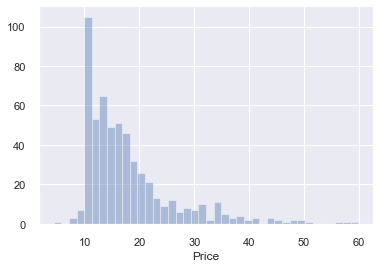

In [883]:
Hist = sns.distplot(chops['Price'], bins=40, kde=False)

figure = Hist.get_figure()    
figure.savefig('Price_Hist.png', dpi=400)

### Let's have a look at the rain data for Charleston, SC

# Data Cleaning

### Step 1: Convert Time_In and Time_Out to datetime64 objects, check against Time_Elapsed for anomolies, remove problem exmaples

In [799]:
chops['Time_In_2'] = pd.to_datetime(chops['Time_In'], format='%M:%S')

# Get names of indexes for which column Time_Out has value 120:22
indexNames = chops[chops['Time_Out'] == '120:22'].index
chops.drop(indexNames , inplace=True)

indexNames = chops[chops['Time_Out'] == '134:41'].index
chops.drop(indexNames , inplace=True)

chops['Time_Out_2'] = pd.to_datetime(chops['Time_Out'], format='%M:%S')
chops.head()

#chops['Time_In']
chops['Time_Elapsed_2'] = chops['Time_Out_2'] - chops['Time_In_2']
chops['Time_Elapsed_2']=chops['Time_Elapsed_2']/np.timedelta64(1,'s')

filtered_df = chops[chops['Time_Elapsed_2'].notnull()]
filtered_df

np.sum(chops['Time_Elapsed_2'] - chops['Time_Elapsed'])
indexNames = chops[(chops['Time_Elapsed_2'] != chops['Time_Elapsed']) & (pd.notna(chops['Time_Elapsed_2'])) & (pd.notna(chops['Time_Elapsed']))].index
indexNames

chops.iloc[ indexNames , : ]

chops.drop(indexNames , inplace=True)

np.sum(chops['Time_Elapsed_2'] - chops['Time_Elapsed'])


0.0

### Step 2: Remove examples with missing Time_Elapsed data

In [800]:
indexNames = chops[pd.isna(chops['Time_Elapsed'])].index
print(len(indexNames))

chops.drop(indexNames , inplace=True)

chops = chops.drop(columns=['Time_In_2', 'Time_Out_2', 'Time_Elapsed_2'])

chops.reset_index()
chops.head()


313


,Street_Address,Date,Tip,Phone_Number,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles,Rain
2,1 Broad,2016-07-01,NaN,8.434065e+09,M,W,17.34,R,11:17,11:53,M,36.0,1.114170,No
6,1.5 Carolina,2016-06-22,4.2,8.432977e+09,M,R,15.80,C,20:27,21:04,Y,37.0,3.047967,No
7,1.5 Carolina,2016-05-31,4.2,NaN,M,R,15.80,C,19:18,20:30,NaN,72.0,3.047967,Yes
8,10 Lee,2016-06-29,0.0,NaN,F,R,21.65,C,18:54,19:30,M,36.0,1.592027,Yes
9,10 Meeting,2016-06-15,0.5,8.437371e+09,M,W,10.50,C,11:05,11:56,M,51.0,1.272627,No


### Step 3: Impute missing prices based on median ($15.60)

In [801]:
chops['Price'] = chops['Price'].fillna(15.6)

### Step 4: Impute missing tips based on average tip percentage based on price

In [802]:
chops['tip_percentage'] = chops['Tip'] / chops['Price']
tip_percentage = chops['tip_percentage'].mean()
chops['Tip_NA'] = chops['Price'] * tip_percentage

In [803]:
chops['Tip'] = chops['Tip'].fillna(chops['Tip_NA'])

### Step 5: Remove Phone_Number

In [804]:
chops_backup = chops
chops = chops.drop(['Phone_Number'],axis = 1)

### Step 6: Impute missing gender values with "U" for "Unknown"

In [805]:
chops_backup = chops
chops['Gender'] = chops['Gender'].fillna('U')
chops.loc[chops['Gender'] == 'U', 'Gender'] = 'F'

### Step 7: Impute missing Type values with mode = "R"

In [806]:
chops_backup = chops
chops['Type'] = chops['Type'].fillna('R')

### Step 8: Impute missing payment type values with "U" for "Unknown"

In [807]:
chops_backup = chops
chops['Payment_Type'] = chops['Payment_Type'].fillna('U')

### Step 9: Impute missing age values with "U" for "Unknown"

In [808]:
chops_backup = chops
chops['Age'] = chops['Age'].fillna('U')

### Step 10: Impute missing rain value with mode ="No"

In [809]:
chops_backup = chops
chops['Rain'] = chops['Rain'].fillna('No')
chops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 2 to 771
Data columns (total 15 columns):
Street_Address    454 non-null object
Date              454 non-null datetime64[ns]
Tip               454 non-null float64
Gender            454 non-null object
Type              454 non-null object
Price             454 non-null float64
Payment_Type      454 non-null object
Time_In           454 non-null object
Time_Out          454 non-null object
Age               454 non-null object
Time_Elapsed      454 non-null float64
Miles             454 non-null float64
Rain              454 non-null object
tip_percentage    435 non-null float64
Tip_NA            454 non-null float64
dtypes: datetime64[ns](1), float64(6), object(8)
memory usage: 56.8+ KB


### Final Step: Remove working columns, set index to street address

In [810]:
chops_backup = chops
chops = chops.drop(['tip_percentage'],axis = 1)
chops = chops.drop(['Tip_NA'],axis = 1)

#chops = chops.set_index('Street_Address')

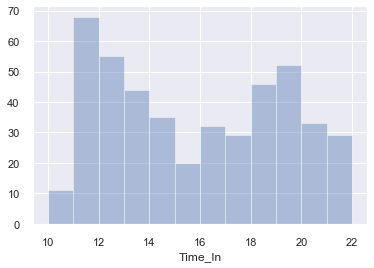

In [811]:
#chops["binned_hours"] = pd.cut(chops["Time_In"].timestamp.dt.min, bins=24)
#chops2['Time_In_Binned'] = chops['Time_In'].str[:2]
#chops2['Time_Out_Binned'] = chops['Time_Out'].str[:2]
chops2['Time_In_Binned'] = pd.to_numeric(chops2['Time_In_Binned'], errors='coerce')
chops2['Time_Out_Binned'] = pd.to_numeric(chops2['Time_Out_Binned'], errors='coerce')

chops2['Time_In'] = chops2['Time_In_Binned']
Hist = sns.distplot(chops2['Time_In'], bins=12, kde=False, hist = 'true')

figure = Hist.get_figure()    
figure.savefig('Time_In.png', dpi=400)

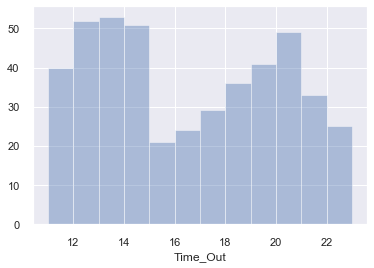

In [812]:
chops2['Time_Out'] = chops2['Time_Out_Binned']
Hist = sns.distplot(chops2['Time_Out'], bins=12, kde=False)

figure = Hist.get_figure()    
figure.savefig('Time_Out.png', dpi=400)

In [813]:
chops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 2 to 771
Data columns (total 13 columns):
Street_Address    454 non-null object
Date              454 non-null datetime64[ns]
Tip               454 non-null float64
Gender            454 non-null object
Type              454 non-null object
Price             454 non-null float64
Payment_Type      454 non-null object
Time_In           454 non-null object
Time_Out          454 non-null object
Age               454 non-null object
Time_Elapsed      454 non-null float64
Miles             454 non-null float64
Rain              454 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 49.7+ KB


# Data quality after processing

In [784]:
chops_prof_after = ProfileReport(chops)
chops_prof_after.to_file(output_file='chops_profile_after.html')

In [815]:
Data_Quality = chops.describe(include='all')
Data_Quality
Data_Quality.to_csv('asfasdv.csv')

In [827]:
chops['Rain'].value_counts()

No     303
Yes    151
Name: Rain, dtype: int64

In [832]:
chops = chops.reset_index(drop=True)
chops.head(10)

,Street_Address,Date,Tip,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles,Rain
0,1 Broad,2016-07-01,3.353866,M,W,17.34,R,11:17,11:53,M,36.0,1.114170,No
1,1.5 Carolina,2016-06-22,4.200000,M,R,15.80,C,20:27,21:04,Y,37.0,3.047967,No
2,1.5 Carolina,2016-05-31,4.200000,M,R,15.80,C,19:18,20:30,U,72.0,3.047967,Yes
3,10 Lee,2016-06-29,0.000000,F,R,21.65,C,18:54,19:30,M,36.0,1.592027,Yes
4,10 Meeting,2016-06-15,0.500000,M,W,10.50,C,11:05,11:56,M,51.0,1.272627,No
5,10 Warren,2016-06-20,0.000000,F,R,10.00,R,11:38,12:36,Y,58.0,0.488420,No
6,10 Warren,2016-06-27,0.000000,F,R,10.00,R,11:38,12:36,Y,58.0,0.488420,No
7,100 America,2016-07-01,0.854907,M,R,4.42,R,18:49,19:23,Y,34.0,1.389450,No
8,100 Smith,2016-07-01,2.980570,F,R,15.41,C,21:33,22:13,Y,40.0,0.782964,No
9,100 Smith,2016-07-11,6.350000,M,R,33.65,C,16:49,17:20,Y,31.0,0.782964,No


In [834]:
#pd.set_option('display.max_rows', chops.shape[0]+1)
#chops

In [835]:
chops.to_csv('chops_after_cleaning.csv')

## Visualisations

In [841]:
chops.corr()

,Tip,Price,Time_Elapsed,Miles
Tip,1.000000,0.446942,0.099082,0.083007
Price,0.446942,1.000000,0.126980,0.135616
Time_Elapsed,0.099082,0.126980,1.000000,0.186786
Miles,0.083007,0.135616,0.186786,1.000000


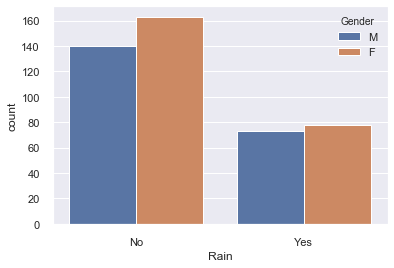

In [874]:
#Age_Type = sns.countplot(x="Age", hue="Payment_Type", data=chops)
#Age_Type.savefig('PairPlot.png', dpi=400)
Date_Rain = sns.countplot(x="Rain", hue="Gender", data=chops)

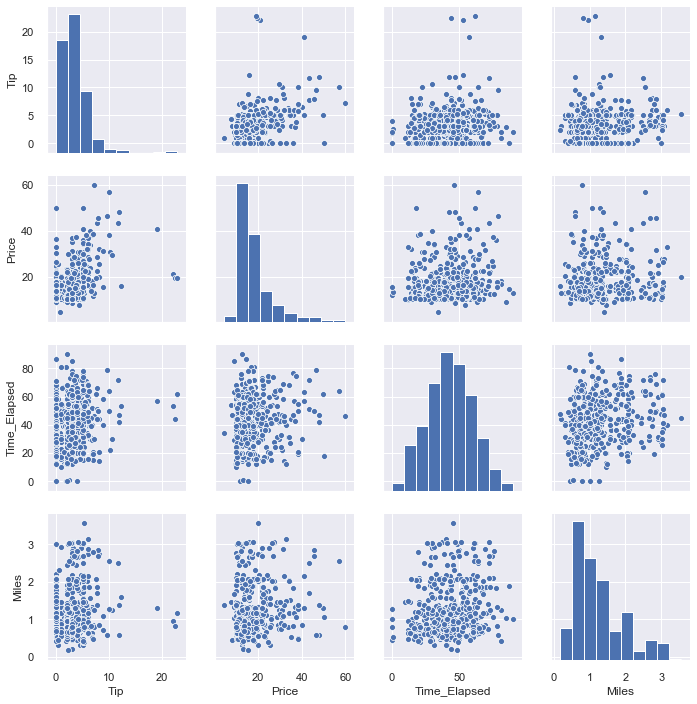

In [850]:
PairPlot = sns.pairplot(chops)
PairPlot.savefig('PairPlot.png', dpi=400)

NameError: name 'sns' is not defined